# Diferencias divididas de orden 0
##### Dada una lista de datos: 
\begin{equation}
data = \left((x_0,y_0),(x_1,y_1),\ldots,(x_n,y_n)\right),
\end{equation}
##### definimos un objeto que se asocia a cada $x_i$ de la lista, lo denotaremos por $f[x_i]$ y recibirá el nombre de diferencia de orden cero evaluada en $x_i$. Así, definimos las diferencias de orden cero para la lista $data$ como:
\begin{equation}
f[x_i] = y_i
\end{equation}
# Diferencias divididas de orden 1
##### De aqui en adelante definimos lo que se llamará diferencias divididas de orden superior en forma recursiva. Es decir, usando diferencias divididas de orden 0 podemos definir una diferencia dividida de orden 1 y lo haremos basados en el concepto de pendiente entre dos puntos. Recordemos que una pendiente entre dos puntos $(x_i,y_i)$ y $(x_j,y_j)$ se puede calcular como:
\begin{equation}
m = \frac{\Delta y}{\Delta x} = \frac{y_j - y_i}{x_j - x_i} 
\end{equation}
##### de aqui vemos que el numerador de la pendiente es la diferencia entre dos diferencias de orden cero evaluadas en los puntos $x_i$ y $x_j$. Entonces podemos escribir:
\begin{equation}
m = \frac{y_j - y_i}{x_j - x_i} = \frac{f[x_j] - f[x_i]}{x_j - x_i}
\end{equation}
##### Y definimos una diferencia de orden 1 como la pendiente calculada entre dos puntos $(x_i,y_i)$ y $(x_j,y_j)$, escribimos $m = f[x_i,x_j]$ y por lo tanto:
\begin{equation}
f[x_i,x_j] =\frac{f[x_j] - f[x_i]}{x_j - x_i},
\end{equation}
# Diferencias divididas de orden k
##### La definicion anterior nace del concepto de pendiente pero nos permitirá extender su uso para definir diferencias de orden aun mayor. Pensemos en que una diferencia de orden 1 se calcula tomando la resta de dos diferencias de orden 0 (esto implica que una diferencia de orden 1 requiere tomar 2 puntos), asi mismo vamos a definir una diferencia de orden 2 tomando la resta de dos diferencias de orden 1 así:
\begin{equation}
f[x_i,x_j,x_k] =\frac{f[x_j,x_k] - f[x_i,x_j]}{x_k - x_i},
\end{equation}
##### aqui vemos que una diferencia de orden 2 requiere tomar tres puntos $(x_i,y_i)$, $(x_j,y_j)$ y $(x_k,y_k)$, y que las diferencias de orden 1 correspondientes toman los primeros dos y los ultimos dos datos de la lista de 3 elementos que se esta considerando. Por lo tanto, ya podemos definir una diferencia de orden k (la cual requiere tomar $k+1$ elementos $\left((x_0,y_0),(x_1,y_1),\ldots,(x_k,y_k)\right)$) de la siguiente manera:
\begin{equation}
f[x_0,x_1,\ldots,x_k] =\frac{f[x_1,\ldots,x_k] - f[x_0,\ldots,x_{k-1}]}{x_k - x_0},
\end{equation}
# Tabla de diferencias divididas
##### La definicion de diferencias divididas construida en la seccion anterior muestra que el calculo de las mismas para diferentes ordenes es recursivo, en general para calcular una diferencia de orden $n$, asociada a una lista de $n+1$ datos, será necesario calcular todas las diferencias posibles de ordenes menores y esto se puede representar dentro de una matriz triangular como se muestra a continuación: 
<img src="NewtonTable.png" alt="Alt text that describes the graphic" title="Title text" />

# Polinomio de Interpolacion de Newton
##### Dada una lista que contiene $(n+1)$ datos en la forma:
\begin{equation}
data = \left((x_0,y_0),(x_1,y_1),\ldots,(x_n,y_n)\right)
\end{equation}
##### El método de interpolacion de Newton permite construir un polinomio $P(x)$ que interpola todos los datos de la lista $data$, y que por lo tanto satisface la condicion:
\begin{equation}
P(x_i) = y_i \quad \forall \quad i = 0,1,...,n
\end{equation}
##### El polinomio tiene la forma: 
\begin{equation}
P(x)=f[x_0]+\sum_{k=1}^{n}f[x_0,x_1,\ldots,x_k]L_{k-1}(x),
\end{equation}
##### aqui la funcion $L_k(x)$ esta definida por:
\begin{equation}
L_k(x) = \prod_{i=0}^k \left(x - x_i \right)
\end{equation}
##### los puntos $x_i$ pertenecen a la lista de datos $data$, ademas el polinomio esta escrito en terminos de diferencias divididas las cuales definimos en la seccion anterior. Nótese que para calcular este polinomio completamente es necesario antes calcular la tabla de diferencias divididas. 

In [1]:
# Aqui construimos nuestra funcion de interpolacion de Newton

def NewtonPol(dat):
    # la funcion NewtonPol crea un objeto que evalua un polinomio en un cierto valor de x
    n = len(dat)-1
    F = [[0 for x in dat] for x in dat]  # crear tabla nula

    for i, p in enumerate(dat):  # condiciones iniciales
        F[i][0] = p[1]

    for i in range(1, n+1):  # tabla de diferencias divididas
        for j in range(1, i+1):
            F[i][j] = (F[i][j-1]-F[i-1][j-1])/(dat[i][0]-dat[i-j][0])

    def L(k, x):  # polinomio $L_k(x)=\prod\limits_{i \leq k}(x-x_i)$
        out = 1.0
        for i, p in enumerate(dat):
            if i <= k:
                out *= (x-p[0])
        return out

    def P(x):  # $P(x)=f[x_0]+\sum_{k=1}^{n}f[x_0,x_1,\ldots,x_k]L_{k-1}(x)$
        newt = 0.0
        for i in range(1, n+1):
            newt += F[i][i]*L(i-1, x)
        return newt + F[0][0]

    return F, P

In [2]:
# tomamos como ejemplo la siguiente lista de datos y calculamos su tabla de diferencias 
# divididas y el polinomio de Newton correspondiente:
datos = [[0.1,3.2],[0.2,4.5],[0.3,5.1],[0.4,6.7],[0.5,7.1],[0.6,7.9]]
Table, Pn = NewtonPol(datos)

In [3]:
# Aqui podemos ver la estructura de la tabla de diferencias divididas
# estructurandola dentro de un DataFrame usando la libreria Pandas
import pandas as pd
df = pd.DataFrame(Table)
print(df)

     0     1     2           3            4            5
0  3.2   0.0   0.0    0.000000     0.000000     0.000000
1  4.5  13.0   0.0    0.000000     0.000000     0.000000
2  5.1   6.0 -35.0    0.000000     0.000000     0.000000
3  6.7  16.0  50.0  283.333333     0.000000     0.000000
4  7.1   4.0 -60.0 -366.666667 -1625.000000     0.000000
5  7.9   8.0  20.0  266.666667  1583.333333  6416.666667


In [4]:
# luego evaluamos el polinomio en un valor particular de x
Pn(0.55)

6.991015624999998

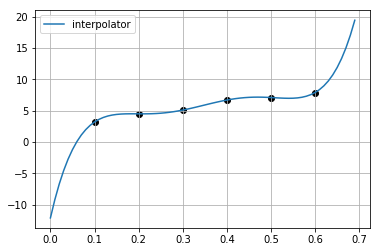

In [5]:
# Vamos a graficar el polinomio resultante sobre un cierto intervalo [0.0,0.5] 
# y comparamos con los datos originales.
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0.0,0.7,0.01)
y = np.zeros(np.size(x))
for i in range(np.size(x)):
    y[i]=Pn(x[i])
    
plt.plot(x,y,label='interpolator')
for p in datos: 
    plt.scatter(p[0],p[1],c = 'k')
plt.legend()
plt.grid(True)
plt.show()